In [76]:
# Importing all libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
url  = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df[['Hours', 'Scores']][df.Hours == df['Hours'].max()]

,Hours,Scores
6,9.2,88


In [8]:
df[['Hours', 'Scores']][df.Hours == df['Hours'].min()]

,Hours,Scores
14,1.1,17


### Preparing the data 

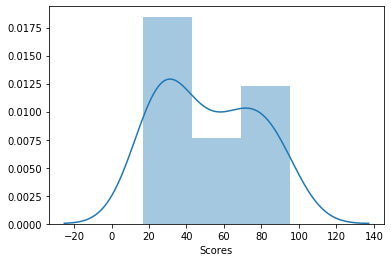

In [78]:
sns.distplot(df['Scores'])

In [28]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

Text(0.5, 1.0, 'Hours vs Scores')

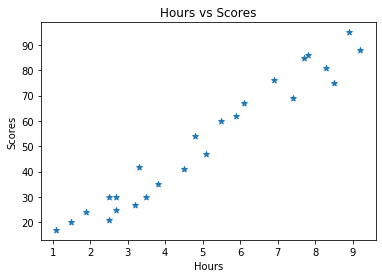

In [29]:
plt.scatter(X , y , marker = '*')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [51]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Training complete..!")

Training complete..!


In [52]:
print(" Regression Coefficient: ", reg.coef_)
print(" Regression Intercept: ", reg.intercept_)

 Regression Coefficient:  [9.78856669]
 Regression Intercept:  2.370815382341881


Text(0, 0.5, 'Marks')

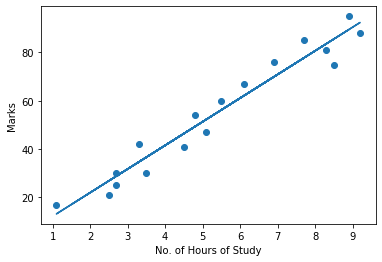

In [56]:
line = reg.coef_*X + reg.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train)
plt.plot(X, line)
plt.xlabel("No. of Hours of Study")
plt.ylabel("Marks")


In [ ]:
### Prediction 

In [58]:
y_pred = reg.predict(X_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [60]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [61]:
compare

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [74]:
hours = 2.5
own_data = reg.predict([[hours]])

print("No. of Hours: {}".format(hours))
print("Predicted Score: {}".format(own_data))

No. of Hours: 2.5
Predicted Score: [26.8422321]


### Model Evaluation

In [79]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("Accuracy for the Model: ",score)

Accuracy for the Model:  0.9568211104435257
